In [1]:
#importing libraries necessary for the proceesing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
import boto3
%matplotlib inline

In [2]:
#Importing data
data = pd.read_csv('hour.csv')
print(data.shape)

(17379, 17)


In [3]:
#Check the data types of the features
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
#Renaming column names and droping features which are not important for predicting the model to make things easy
data.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)
data = data.drop(['instant','dteday'], axis=1)

data.head()

,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#converting the datatypes to categorical data to make things easy for prediction
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')
#data['yr'] = data.yr.astype('category')


In [6]:
#To check if the data has null values
data.isnull().any()

season        False
yr            False
month         False
hour          False
holiday       False
weekday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

[Text(0.5, 1.0, 'Relation between feeling temperature and total users')]

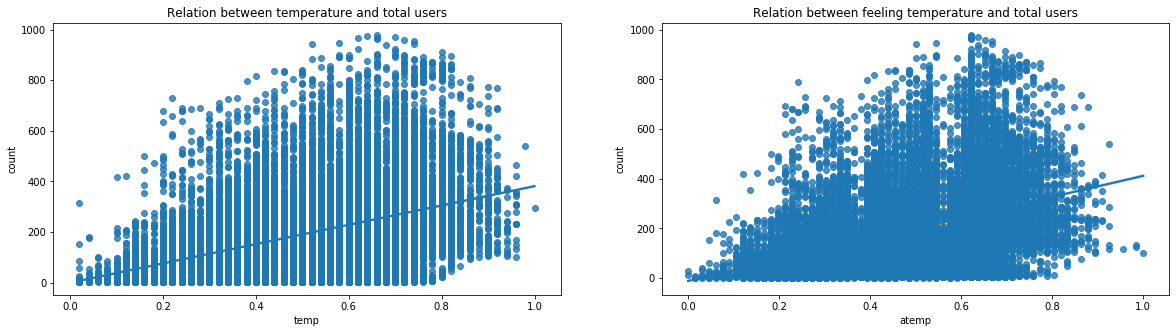

In [7]:
#Plotting relations between temperature and feeling temperature with total users.
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=data['temp'], y=data['count'], ax=ax1)
ax1.set(title="Relation between temperature and total users")
sns.regplot(x=data['atemp'], y=data['count'], ax=ax2)
ax2.set(title="Relation between feeling temperature and total users")

[Text(0.5, 1.0, 'Relation between humidity and total users')]

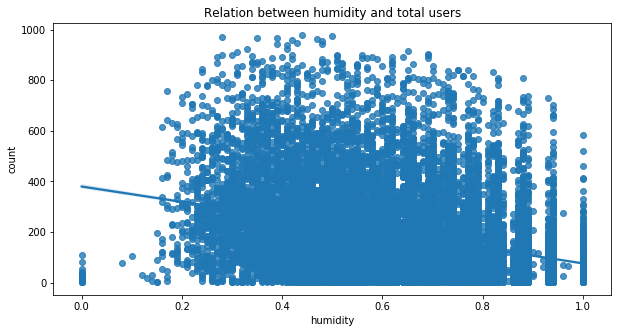

In [8]:
#Relation between humidity and total users
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.regplot(x=data['humidity'], y=data['count'], ax=ax1)
ax1.set(title="Relation between humidity and total users")

[Text(0.5, 1.0, 'Weather distribution')]

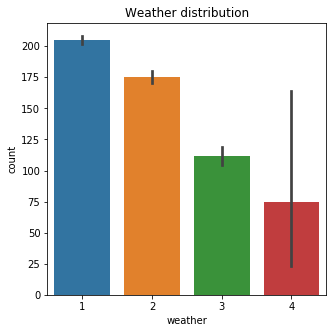

In [9]:
#Weather distribution with respect to count variable
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=data[['weather',
                      'count']],
            x='weather', y='count')
ax.set(title="Weather distribution")

[Text(0.5, 1.0, 'Windspeed distribution')]

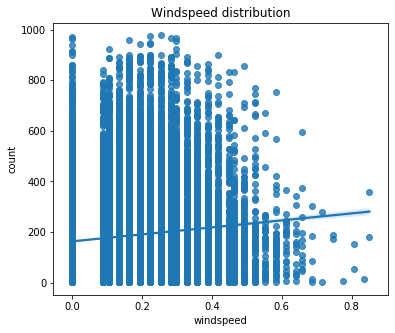

In [10]:
#Windspeed distribution with respect to count variable
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,5))
sns.regplot(x=data['windspeed'], y=data['count'], ax=ax1)
ax1.set(title="Windspeed distribution")

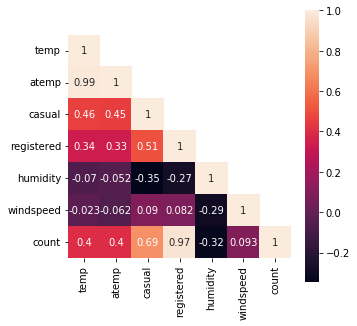

In [11]:
#Correlation matrix to find the correlation between features
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(5,5))
sns.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

[Text(0.5, 1.0, 'Weekly trends')]

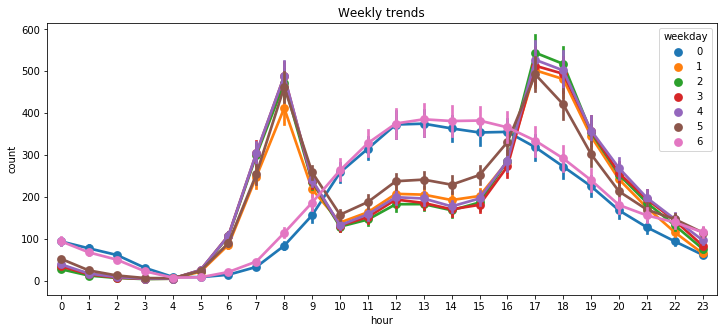

In [12]:
#Weekly trends of how total users use bike with respect to hour
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(data=data[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)
ax.set(title="Weekly trends")

[Text(0.5, 1.0, 'Use of the system by casual users')]

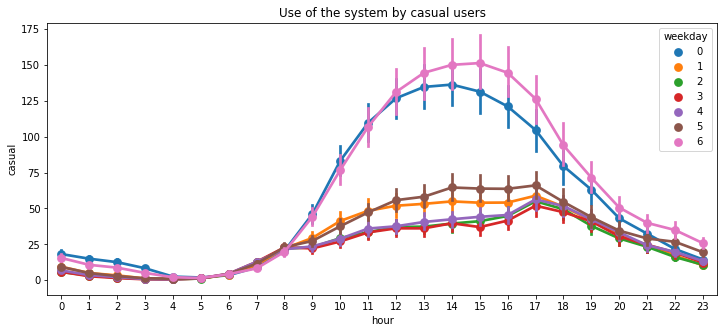

In [13]:
#Weekly trends of how casual users use bike with respect to hour
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(data=data[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by casual users")

[Text(0.5, 1.0, 'Use of the system by registered users')]

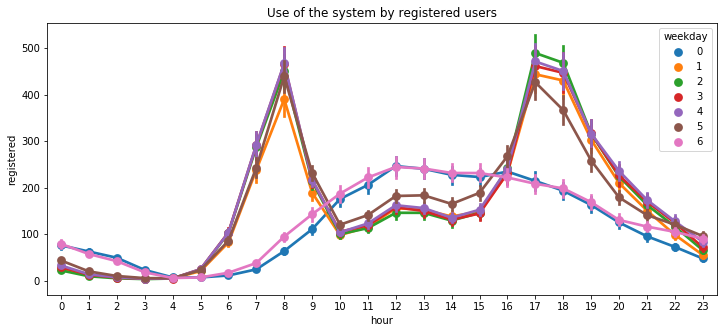

In [14]:
#Weekly trends of how registered users use bike with respect to hour
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(data=data[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by registered users")

[Text(0.5, 1.0, 'Seasonal distribution')]

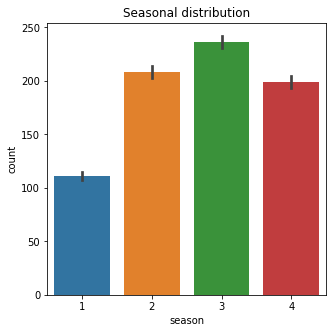

In [15]:
#Seasonal distribution of the bike users
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=data[['season',
                      'count']],
            x='season', y='count')
ax.set(title="Seasonal distribution")

[Text(0.5, 1.0, 'Yearly distribution')]

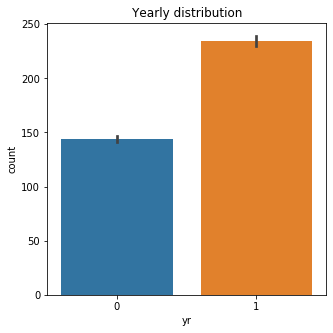

In [16]:
#Yearly distribution of the bike users
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=data[['yr',
                      'count']],
            x='yr', y='count')
ax.set(title="Yearly distribution")

/home/kusumapani/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1, 'Distribution after log of count')]

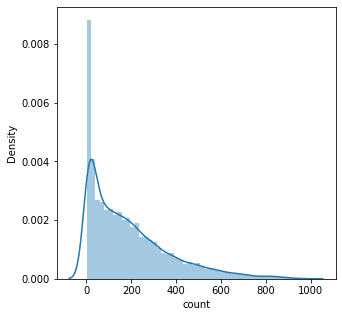

In [17]:
#normal distribution of count variable before log transformation

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")






/home/kusumapani/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1, 'Distribution after log of count')]

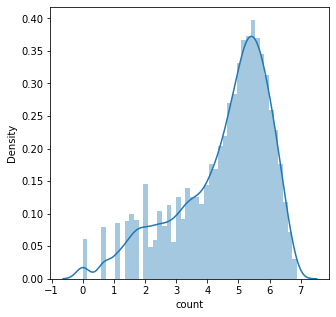

In [18]:
#normal distribution of count variable after log transformation
import math
data['count'] = data['count'].transform(lambda x: math.log(x))
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")





In [19]:
#Splitting data set into training set and test set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


y = data['count']
X = data.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.35,
                                                   random_state=42)

In [20]:
#Data preproccesing step to standardize values before training the model
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

In [21]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [22]:
grid_search.fit(X_train_std, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/kusumapani/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.9min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [23]:
#Training the model usin Random forest regressor
y_train_pred = grid_search.predict(X_train_std)
y_test_pred = grid_search.predict(X_test_std)
residuals = y_test-y_test_pred

In [24]:
#Calulating RMSE and r2 score 
#Root_Mean_Square_Error(RMSE) is accuracy criteria for this problem
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#Root_Mean_Square_Error(RMSE) is accuracy criteria for this problem
print('RMSE_train:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE_test:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSE_train: 0.0848693423326101
RMSE_test: 0.1298119749549318
R2 train: 0.997
R2 test: 0.993


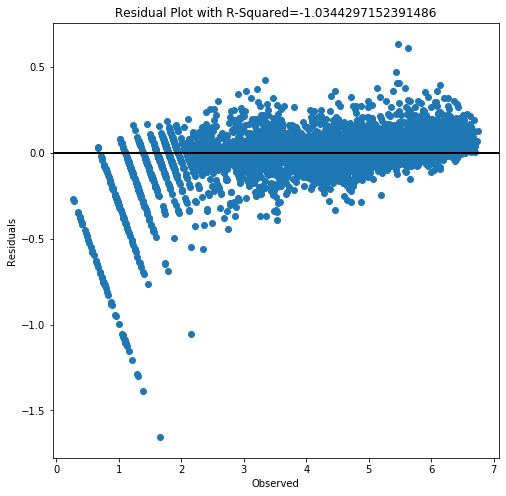

In [25]:
#Plotting Residual plot to check how well the model has done

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test_pred, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(grid_search.score(X_test,y_test))))
plt.show()